# Imports

In [202]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

import json

# Loading data

In [237]:
def load_results(src_lang, tgt_lang):
    json_fn = '../data/tatoeba/' + src_lang + '-' + tgt_lang + "_results.json"

    with open(json_fn, 'r') as json_file:
        results = json.load(json_file)
        json_file.close()
        
    
    return results

def preprocess(results):
    df = pd.DataFrame(results).transpose()
    df = df.fillna(0)
    df.index.name = 'word'
    df['characters'] = df.index.map(lambda w: len(w))
    
#     df['count'] = df['wrong_gold'] + df['correct_gold']
    
    df['count_bins'] = pd.cut(df['count'], bins=[ 0,9,100,1000000], labels=['1-9', '10-100', '>100'])
    df['mid_frequency'] =  (df['count'] >= 10 ) & (df['count'] < 100 ) & (df['correct_gold'] > 0)# | (df['correct_mt'] > 0))
    df['characters_bins'] = pd.cut(df['characters'],bins=[0,5, 10, 15, 10000], labels=['<=5', '5-10', '10-15', '>15'])
    df = df.sort_values(by=['count'])
    df['characters_by_tokens'] = df['characters'] / df['tokens']
    df['accuracy_mt'] = df['correct_mt'] / (df['correct_mt'] + df['miss_mt'])
    df['accuracy_gold'] = df['correct_gold'] / (df['correct_gold'] + df['miss_gold'])

    #df = df[(df['correct_gold'] > 0.)] # | (df['correct_mt'] > 0.)]
    return df
    

In [238]:
results_de = load_results("en", "de")
results_he = load_results("en", "he")

df_de = preprocess(results_de)
df_he = preprocess(results_he)


In [239]:
df_de['count_bins'].value_counts()


1-9       10910
10-100     3139
>100        499
Name: count_bins, dtype: int64

In [240]:
df_de['tokens'].value_counts()

2.0    5625
3.0    4037
1.0    3759
4.0     979
5.0     129
6.0      16
7.0       3
Name: tokens, dtype: int64

In [241]:

df_de['mid_frequency'].value_counts()

False    13529
True      1019
Name: mid_frequency, dtype: int64

In [242]:
df_de['characters_bins'].value_counts()

5-10     8564
10-15    2882
<=5      2823
>15       279
Name: characters_bins, dtype: int64

In [243]:

df_de[df_de['mid_frequency']]['tokens'].value_counts()

1.0    858
2.0    114
3.0     40
4.0      7
Name: tokens, dtype: int64

array([[<AxesSubplot:title={'center':'characters'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'tokens'}>, <AxesSubplot:>]],
      dtype=object)

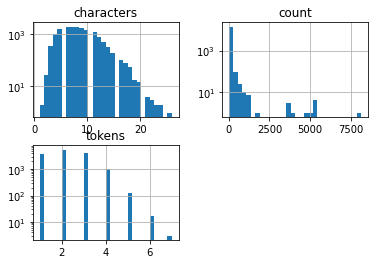

In [244]:
df_de.hist(column=['characters', 'count', 'tokens'], bins=30, log=True)

In [245]:
df_he['count_bins'].value_counts()



1-9       6532
10-100    1497
>100       123
Name: count_bins, dtype: int64

In [246]:

df_he['tokens'].value_counts()


1.0    5860
2.0    2011
3.0     255
4.0      24
5.0       2
Name: tokens, dtype: int64

In [247]:

df_he['characters_bins'].value_counts()

<=5      5749
5-10     2392
10-15      11
>15         0
Name: characters_bins, dtype: int64

In [248]:

df_he['mid_frequency'].value_counts()

False    7188
True      964
Name: mid_frequency, dtype: int64

In [249]:

df_he[df_he['mid_frequency']]['tokens'].value_counts()

1.0    952
2.0     11
3.0      1
Name: tokens, dtype: int64

array([[<AxesSubplot:title={'center':'characters'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'tokens'}>, <AxesSubplot:>]],
      dtype=object)

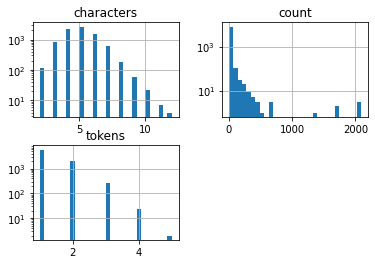

In [250]:
df_he.hist(column=['characters', 'count', 'tokens'], bins=30, log=True)

# Result Plots German

In [251]:
plot_de = pd.melt(df_de, value_vars=['accuracy_mt', 'accuracy_gold'], id_vars=['characters_bins', 'count_bins', 'tokens', 'mid_frequency'], var_name='type',value_name='accuracy')

In [252]:
plot_de

,characters_bins,count_bins,tokens,mid_frequency,type,accuracy
0,<=5,1-9,2.0,False,accuracy_mt,0.000000
1,10-15,1-9,2.0,False,accuracy_mt,NaN
2,10-15,1-9,3.0,False,accuracy_mt,NaN
3,5-10,1-9,2.0,False,accuracy_mt,NaN
4,5-10,1-9,2.0,False,accuracy_mt,NaN
...,...,...,...,...,...,...
29091,<=5,>100,1.0,False,accuracy_gold,0.171652
29092,<=5,>100,1.0,False,accuracy_gold,0.425111
29093,<=5,>100,1.0,False,accuracy_gold,0.398345
29094,<=5,>100,1.0,False,accuracy_gold,0.293009


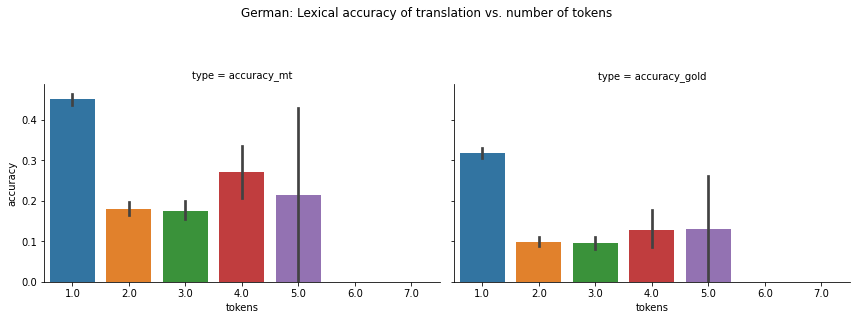

In [253]:
g = sns.catplot(x="tokens", y="accuracy",
                data=plot_de, kind="bar", col='type',
                height=4, aspect=1.5)
fig = g.fig
axes = g.axes

fig.suptitle('German: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

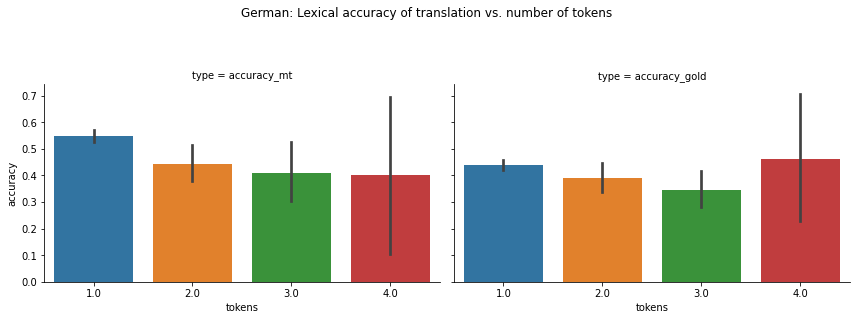

In [254]:
g = sns.catplot(x="tokens", y="accuracy",
                data=plot_de[plot_de['mid_frequency']], kind="bar", col='type',
                height=4, aspect=1.5)
fig = g.fig
axes = g.axes

fig.suptitle('German: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

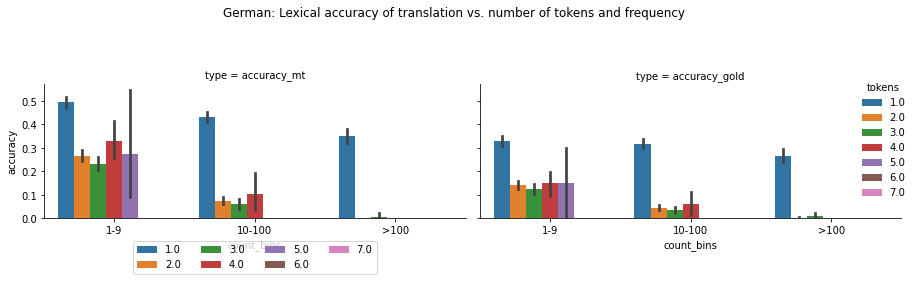

In [255]:
g = sns.catplot(x="count_bins", y="accuracy",
                hue="tokens",
                data=plot_de, kind="bar", col='type',
                height=4, aspect=1.5, legend=True)
fig = g.fig
axes = g.axes
axes[0,0].legend(ncol=4,loc='lower center', bbox_to_anchor=(.5, -0.45))
fig.suptitle('German: Lexical accuracy of translation vs. number of tokens and frequency', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

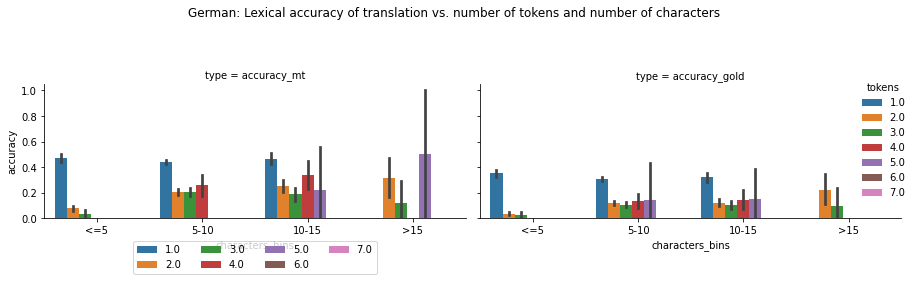

In [256]:
g = sns.catplot(x="characters_bins", y="accuracy",
                hue="tokens",
                data=plot_de, kind="bar", col='type',
                height=4, aspect=1.5, legend=True)
fig = g.fig
axes = g.axes
axes[0,0].legend(ncol=4,loc='lower center', bbox_to_anchor=(.5, -0.45))
fig.suptitle('German: Lexical accuracy of translation vs. number of tokens and number of characters', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()


# Result Plots Hebrew

In [257]:
plot_he = pd.melt(df_he, value_vars=['accuracy_mt', 'accuracy_gold'], id_vars=['characters_bins', 'count_bins', 'tokens', 'mid_frequency'], var_name='type',value_name='accuracy')

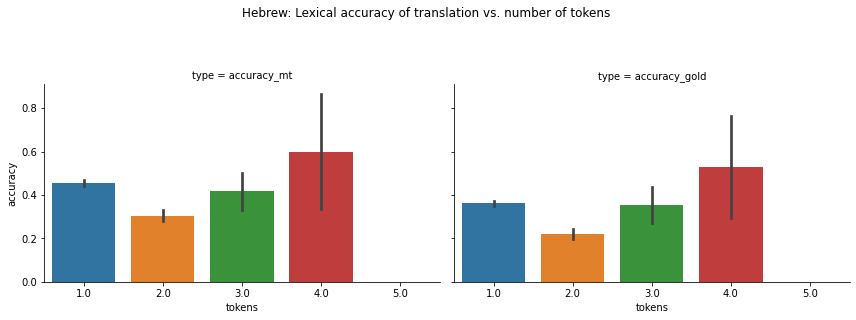

In [258]:
g = sns.catplot(x="tokens", y="accuracy",
                data=plot_he, kind="bar", col='type',
                height=4, aspect=1.5)
fig = g.fig
axes = g.axes

fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

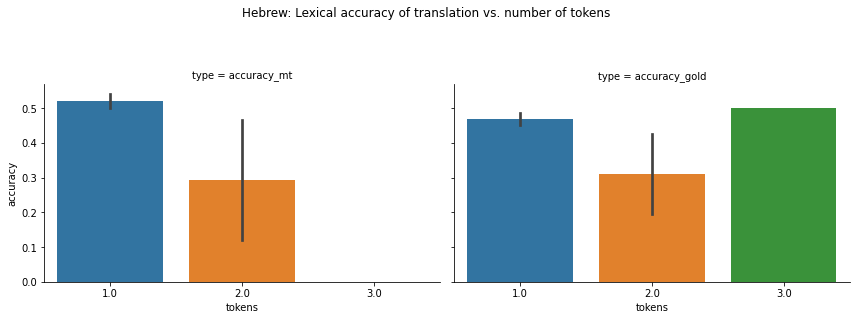

In [259]:
g = sns.catplot(x="tokens", y="accuracy",
                data=plot_he[plot_he['mid_frequency']], kind="bar", col='type',
                height=4, aspect=1.5)
fig = g.fig
axes = g.axes

fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens ', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

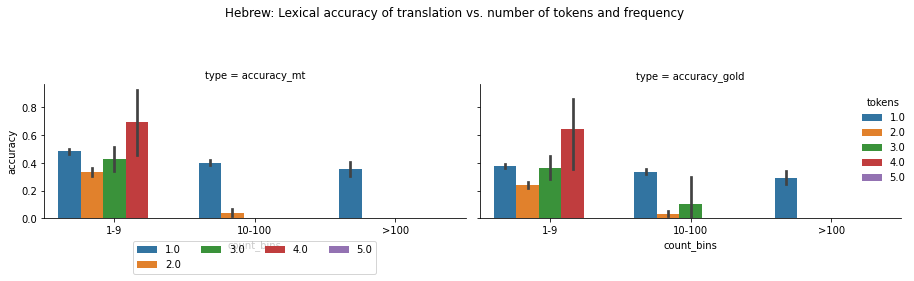

In [260]:
g = sns.catplot(x="count_bins", y="accuracy",
                hue="tokens",
                data=plot_he, kind="bar", col='type',
                height=4, aspect=1.5, legend=True)
fig = g.fig
axes = g.axes
axes[0,0].legend(ncol=4,loc='lower center', bbox_to_anchor=(.5, -0.45))
fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens and frequency', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

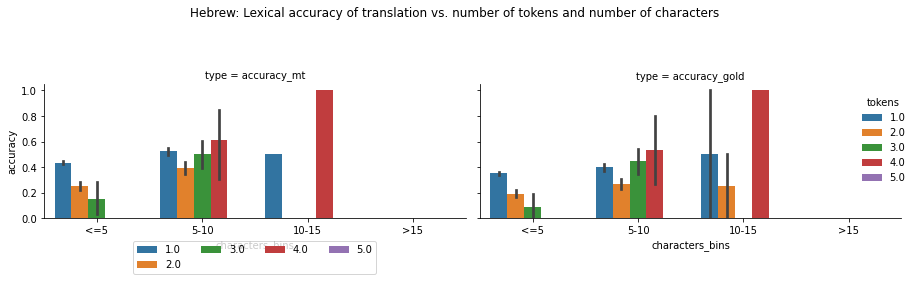

In [262]:
g = sns.catplot(x="characters_bins", y="accuracy",
                hue="tokens",
                data=plot_he, kind="bar", col='type',
                height=4, aspect=1.5, legend=True)
fig = g.fig
axes = g.axes
axes[0,0].legend(ncol=4,loc='lower center', bbox_to_anchor=(.5, -0.45))
fig.suptitle('Hebrew: Lexical accuracy of translation vs. number of tokens and number of characters', y=1.1)
#axes[0,0].xaxis.label.set_visible(False)
#axes[0,2].xaxis.label.set_visible(False)
plt.tight_layout()
# plt.savefig(os.path.join('figures','diverse_script_barplot_d6' + '.pdf'), dpi=300)

plt.show()

## Tokens per characters

Text(30.70563585069445, 0.5, 'Accuracy')

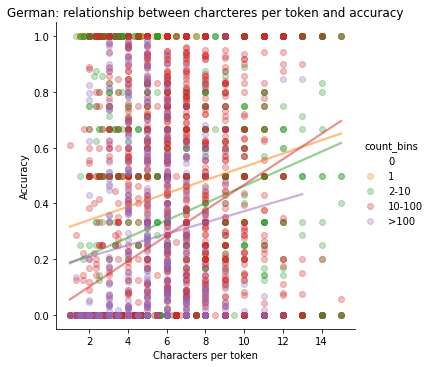

In [228]:
g = sns.lmplot(x="characters_by_tokens", y="accuracy_mt", hue="count_bins",data=df_de,
               scatter_kws={"alpha": 0.3}, line_kws={'alpha': 0.5}, ci=None)
g.ax.set_title("German: relationship between charcteres per token and accuracy")
g.ax.set_xlabel("Characters per token")
g.ax.set_ylabel("Accuracy")

Text(30.70563585069445, 0.5, 'Accuracy')

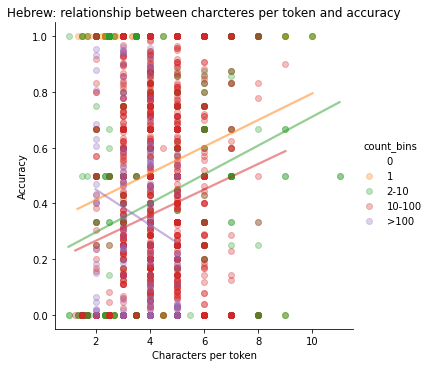

In [229]:
g = sns.lmplot(x="characters_by_tokens", y="accuracy_mt", hue="count_bins",data=df_he,
               scatter_kws={"alpha": 0.3}, line_kws={'alpha': 0.5}, ci=None)
g.ax.set_title("Hebrew: relationship between charcteres per token and accuracy")
g.ax.set_xlabel("Characters per token")
g.ax.set_ylabel("Accuracy")

Text(31.304420572916676, 0.5, 'Accuracy')

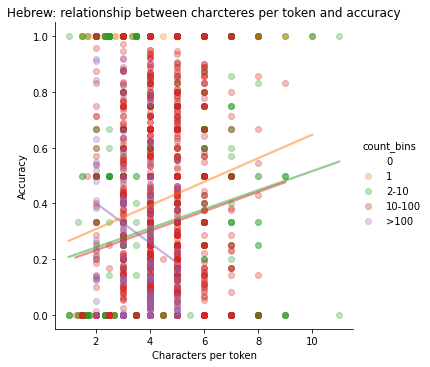

In [230]:
g = sns.lmplot(x="characters_by_tokens", y="accuracy_gold", hue="count_bins",data=df_he,
               scatter_kws={"alpha": 0.3}, line_kws={'alpha': 0.5}, ci=None)
g.ax.set_title("Hebrew: relationship between charcteres per token and accuracy")
g.ax.set_xlabel("Characters per token")
g.ax.set_ylabel("Accuracy")

## Exploratory correlations

<AxesSubplot:>

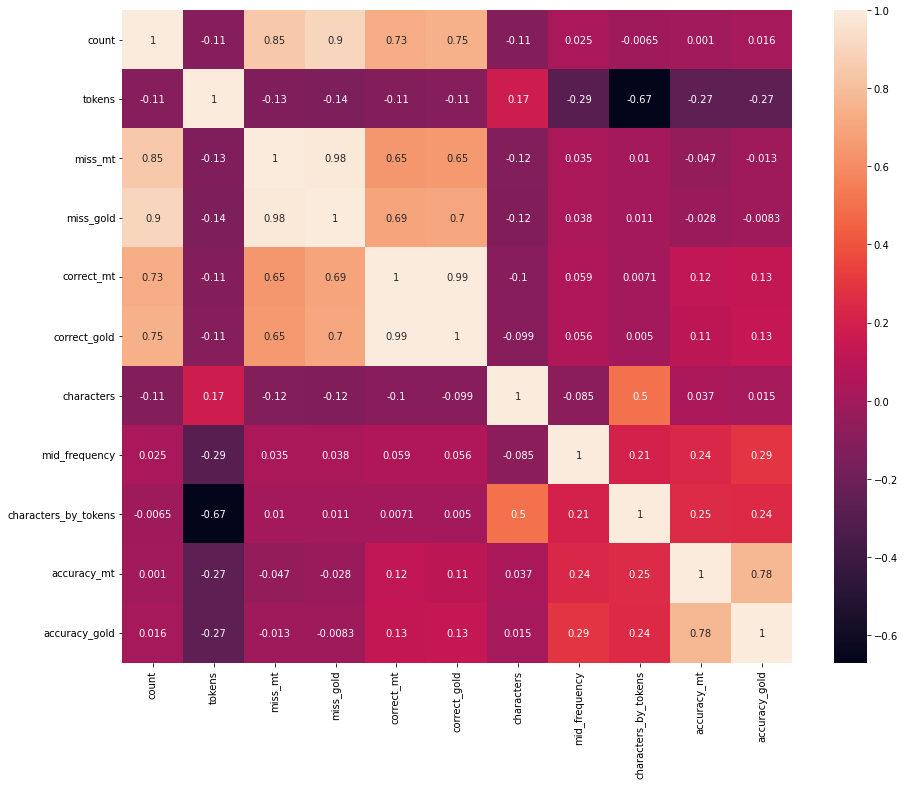

In [231]:
cormat = df_de.corr()
round(cormat,2)
plt.figure(figsize = (15,12))
sns.heatmap(cormat, annot=True)

<AxesSubplot:>

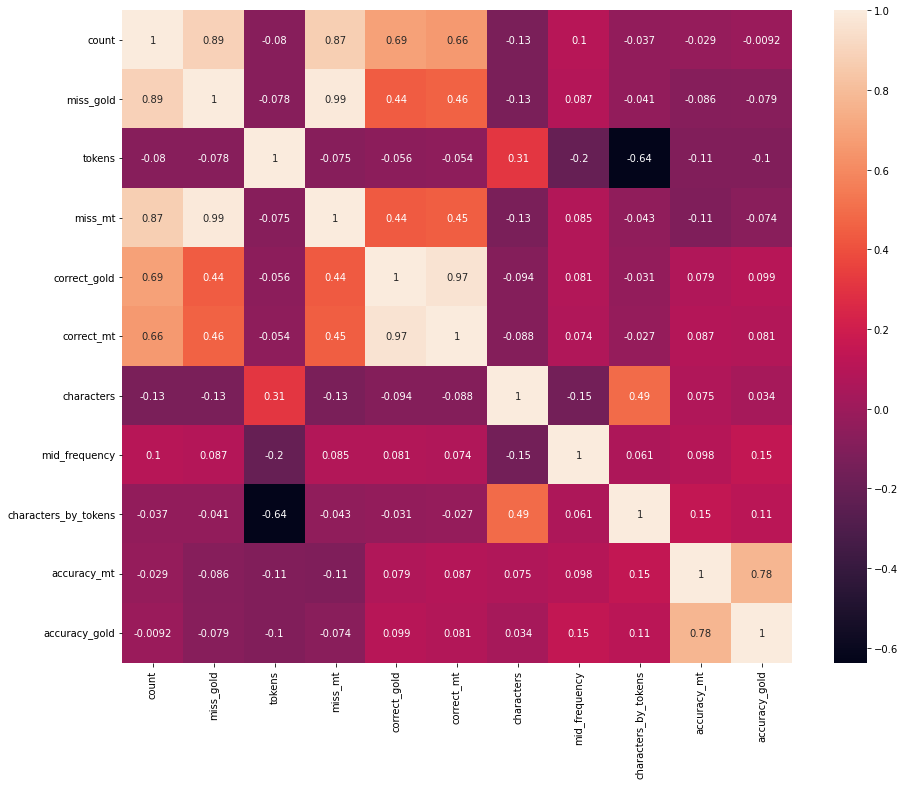

In [232]:
cormat = df_he.corr()
round(cormat,2)
plt.figure(figsize = (15,12))
sns.heatmap(cormat, annot=True)